# Part I - Exploratory Data Analysis of Ford GoBike Data
## by Henry Fasaye

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.  


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


#### Gathering

In [2]:
#read the dataset

df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### Accessing

In [3]:
# check the shape of the dataset
df.shape

(183412, 16)

In [4]:
# get all the column names
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [5]:
# get info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
# get statistical summary about columns with numerical values
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# check for missing values in the dataset 
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
# check for duplicates
df.duplicated().sum()

0

### What is the structure of your dataset?

> - There are 183412 rows and 16 columns in the dataset. Most variables are numeric in nature, but the features `start_station_name, end_station_name, user_type and member_gender` are qualitative nominal variables


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out:
  - how long does the average trip take? what features are best for predicting the time taken(duration) for 
    trip, does it depend on if a user is a subscriber or customer or member's birth year?
  - When are most trips taken in terms of time of day, day of the week, or month of the year?


 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  - I expect user_type, member_gender, member_birth_year and time to have a big effect on the duration of trips


#### Quality Issues:
1.  `missing values`: start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender
2. `wrong datatype`: start_time, end_time, start_station_id, end_station_id, bike_id, member_birth_year, user_type, member_gender, bike_share_for_all_trip.

#### Cleaning data

In [9]:
# Make copy of original dataframe
df_clean = df.copy()

#### Issue 1: missing values

#### Define
Drop all null values using dropna method

#### Code

In [10]:
# Drop missing values 

df_clean = df_clean.dropna().reset_index(drop=True)

#### Test

In [11]:
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [12]:
df_clean.shape

(174952, 16)

#### Issue 2 - wrong datatype: 
- start_time, end_time should be `datetime` datatype
- start_station_id, end_station_id, bike_id should be `string` datatype
- member_birth_year should be `integer` datatype
- user_type, member_gender, bike_share_for_all_trip should be `category`datatype

#### Define:
use astype method to change the type of all the above columns

#### Code

In [13]:
# Change the datatype of start_time and end_time to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

# change the datatype of bike_id, start_station_id, and end_station_id to object
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)
df_clean['bike_id'] = df_clean['bike_id'].astype(str)

# change the datatype of member_birth_year to integer
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)


In [14]:
# change the datatype of user_type, member_gender, and bike_share_for_all_trip to category datatype

df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

####  Test

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
dtypes: category(3), datetime64[ns](2), float64(4), int64(2), obj

#### Feature Engineering and Selection

#### Define
Obtain a new column `Age` by substrating `member_birth_year` from the current year

#### Code

In [16]:
# obtain the age of the members in a new column

df_clean['age'] = 2023 - df_clean['member_birth_year']

In [17]:
df_clean.age.describe(percentiles= [0.99])

count    174952.000000
mean         38.196865
std          10.118731
min          22.000000
50%          36.000000
99%          68.000000
max         145.000000
Name: age, dtype: float64

In [18]:
# consider age within the 99th percentile
df_clean = df_clean.query('age <= 68')

#### Test

In [19]:
df_clean['age'].describe()

count    173272.000000
mean         37.828253
std           9.378430
min          22.000000
25%          31.000000
50%          36.000000
75%          43.000000
max          68.000000
Name: age, dtype: float64

#### Define
From the `start_time` column get month (January-December), month number(1-12), day of the week (Monday - sunday) and hour of the day (0-24)

#### Code

In [20]:
# Start time month (January - December)
df_clean['start_time_month'] = df_clean['start_time'].dt.strftime('%B')

In [21]:
# Start time month (1-12)
df_clean['start_time_month_num'] = df_clean['start_time'].dt.month.astype(int)

In [22]:
# Start time weekday
df_clean['start_time_weekday'] = df_clean['start_time'].dt.strftime('%A')

In [23]:
# Start and end time hour
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour
df_clean['end_time_hour'] = df_clean['end_time'].dt.hour

#### Test

In [24]:
df_clean[['start_time_month','start_time_month_num','start_time_weekday','start_time_hour','end_time_hour']].head()

,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour
0,February,2,Thursday,17,8
1,February,2,Thursday,12,5
2,February,2,Thursday,17,4
3,February,2,Thursday,23,0
4,February,2,Thursday,23,0


#### Define
Obtain a column for duration in minutes by dividing `duration_sec` by 60

#### Code

In [25]:
# Duration in seconds to duration in minutes

df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

#### Test

In [26]:
df_clean.duration_min.head()

0     869
1    1030
2     608
3      26
4      29
Name: duration_min, dtype: int64

#### Define
Drop irrelevant columns

#### Code

In [27]:
# remove irrelevant columns

df_clean = df_clean.drop(['duration_sec','start_station_id','start_station_latitude',
              'start_station_longitude','end_station_id','end_station_latitude','end_station_longitude',
              'bike_id','member_birth_year'], axis = 1)

#### Test

In [28]:
df_clean.columns

Index(['start_time', 'end_time', 'start_station_name', 'end_station_name',
       'user_type', 'member_gender', 'bike_share_for_all_trip', 'age',
       'start_time_month', 'start_time_month_num', 'start_time_weekday',
       'start_time_hour', 'end_time_hour', 'duration_min'],
      dtype='object')

#### Save clean dataset

In [29]:
#df_clean.to_csv('fordgobike_clean.csv', index = False)

## Univariate Exploration

In [30]:
df_clean = pd.read_csv('fordgobike_clean.csv')

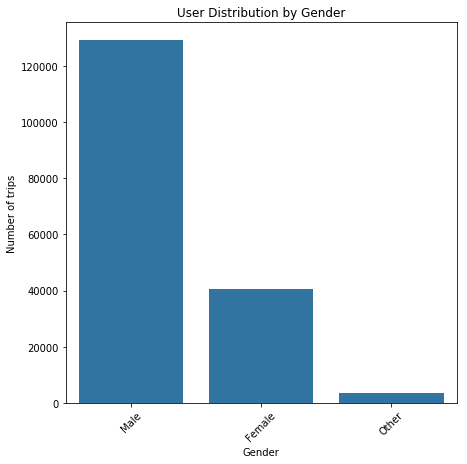

In [31]:
# show gender distribution

plt.figure(figsize = (7,7))
color = sb.color_palette()[0]
order = df_clean.member_gender.value_counts().index

sb.countplot(data=df_clean , x='member_gender' , color=color , order=order)
plt.title('User Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of trips')
plt.xticks(rotation = 45)
plt.show()

> **Observation**: Most of the users are male

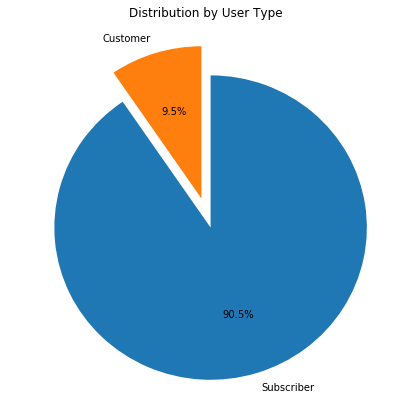

In [32]:
# pie to show user_type

plt.figure(figsize=(7,7))
labels = ('Subscriber','Customer')
type_count = df_clean['user_type'].value_counts()

plt.pie(type_count, startangle = 90, explode =(0.1, 0.1), labels=labels, autopct='%1.1f%%', counterclock = False)
plt.title('Distribution by User Type');

> **Observation**: Most of the users are Subscribers

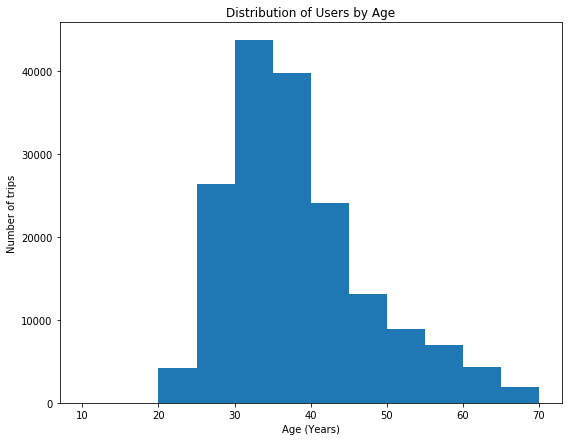

In [33]:
# Age group data

plt.figure(figsize=(9,7))
bins = np.arange(10, (df_clean.age.max()+5), 5)

plt.hist(data = df_clean, x = 'age', bins = bins)
plt.title("Distribution of Users by Age")
plt.xlabel('Age (Years)')
plt.ylabel('Number of trips')
plt.show();

> **Observation**: 
    - most of the users are between 25 and 45 years

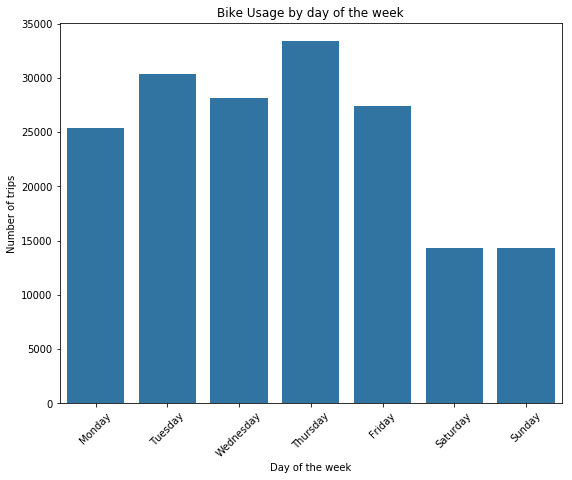

In [34]:
# Distribution by day of the week 

plt.figure(figsize=(9,7))
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sb.countplot(data = df_clean , x = 'start_time_weekday' , color = color , order = weekday)
plt.title('Bike Usage by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of trips')
plt.xticks(rotation = 45)
plt.show()

> **Observation**: There are fewer bike trips on weekends

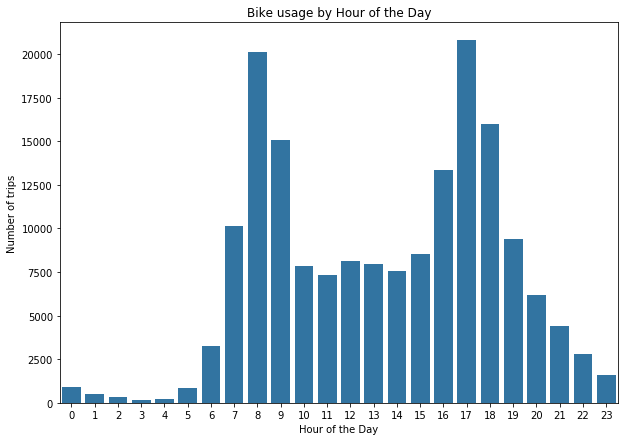

In [35]:
# distribution of rides by hour of the day

plt.figure(figsize=(10,7))

sb.countplot(data = df_clean , x = 'start_time_hour' , color=color )
plt.title('Bike usage by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of trips')
plt.show()

>**Observation**: the distribution have two peak period, there are more trips in the morning between 7-10 AM, and in the evening between 5-7 PM

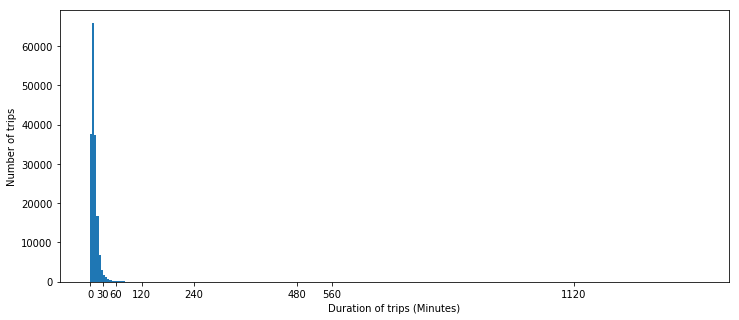

In [36]:
# distribution of durations

bins = np.arange(0, (df_clean.duration_min.max()+5), 5)
plt.figure(figsize=(12,5))
plt.hist(data = df_clean, x = 'duration_min', bins=bins)
plt.xlabel('Duration of trips (Minutes)')
plt.ylabel('Number of trips')

# Generate the x-ticks you want to apply
ticks = [0, 30, 60, 120, 240, 480, 560, 1120]

# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks)
plt.show()

>**Observation**: Most of the trip are between 0 - 30 minutes

In [37]:
df_clean['start_station_name'].value_counts()[:10]

Market St at 10th St                                         3632
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3349
Berry St at 4th St                                           2907
Montgomery St BART Station (Market St at 2nd St)             2690
Powell St BART Station (Market St at 4th St)                 2602
San Francisco Caltrain (Townsend St at 4th St)               2527
San Francisco Ferry Building (Harry Bridges Plaza)           2494
Howard St at Beale St                                        2189
Steuart St at Market St                                      2156
Powell St BART Station (Market St at 5th St)                 2140
Name: start_station_name, dtype: int64

In [38]:
# Subset the dataset and keep the top 10 locations with high traffics

top10_loc = ['Market St at 10th St','San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Berry St at 4th St', 
        'Montgomery St BART Station (Market St at 2nd St)', 'Powell St BART Station (Market St at 4th St)',
        'San Francisco Caltrain (Townsend St at 4th St)', 'San Francisco Ferry Building (Harry Bridges Plaza)',
        'Howard St at Beale St', 'Steuart St at Market St', 'Powell St BART Station (Market St at 5th St)']
df_top10 = df_clean.loc[df_clean['start_station_name'].isin(top10_loc)]

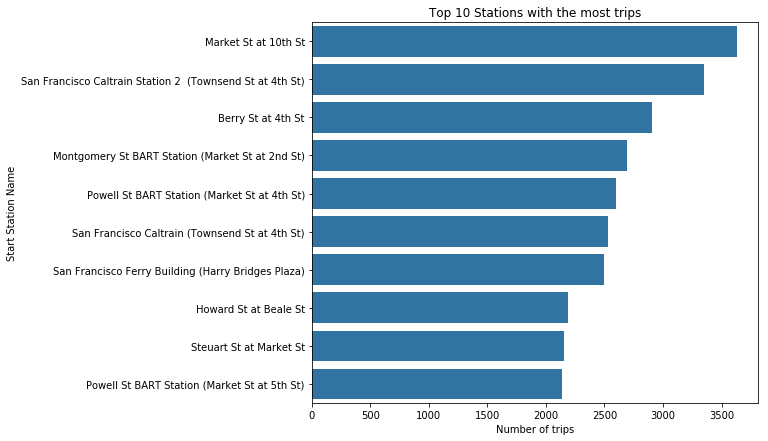

In [39]:
# After subsetting top 10 station with the most trip

stat10_counts = df_top10['start_station_name'].value_counts()
order10 = stat10_counts.index

plt.figure(figsize=(8,7))
base_color = sb.color_palette()[0]

sb.countplot(data = df_top10, y = 'start_station_name', color = base_color, order = order10)
plt.xlabel('Number of trips')
plt.ylabel('Start Station Name')
plt.title('Top 10 Stations with the most trips')
plt.show()

>**Observation**: Market St at 10th St station tops the list of the most use station

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - There are more subscribers than customers 
> - The dataset contains more males than females
> - There are fewer trips on weekends
> - A huge number of the users are between 25 - 45 years


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - I changed the datatype of some columns
> - I created some new columns to make exploration easier
> - I dropped null values
> - I discarded columns that I considered irrelevant

## Bivariate Exploration

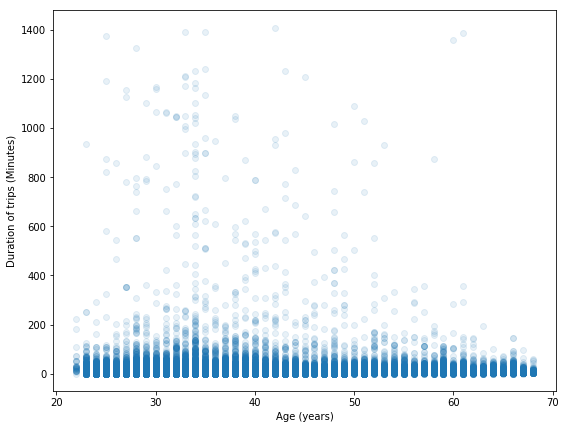

In [40]:
# relationship between ages and duration of trip

plt.figure(figsize=(9,7))
plt.scatter(data = df_clean, x = 'age', y = 'duration_min', alpha= 0.1)
plt.xlabel('Age (years)')
plt.ylabel('Duration of trips (Minutes)')
plt.show()

>**Observation**: There is no significant correlation between age and duration of trips. 

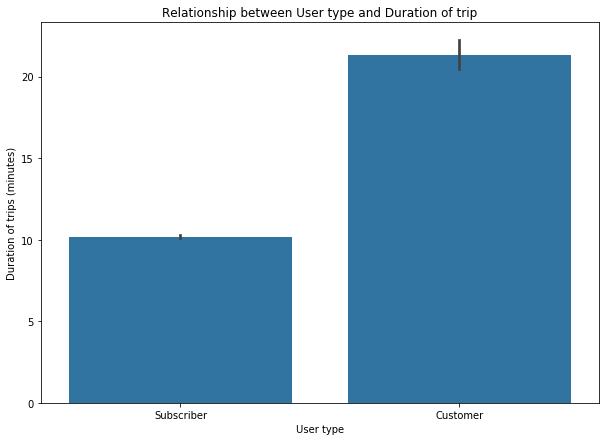

In [41]:
# relation between duration and user type 

plt.figure(figsize=(10,7))
order = df_clean.user_type.value_counts().index

sb.barplot(data = df_clean , x = 'user_type', y = 'duration_min', color = color, order= order )
plt.title('Relationship between User type and Duration of trip')
plt.xlabel('User type')
plt.ylabel('Duration of trips (minutes)')
plt.show()

>**Observation**: Customers take longer trips than Subscribers

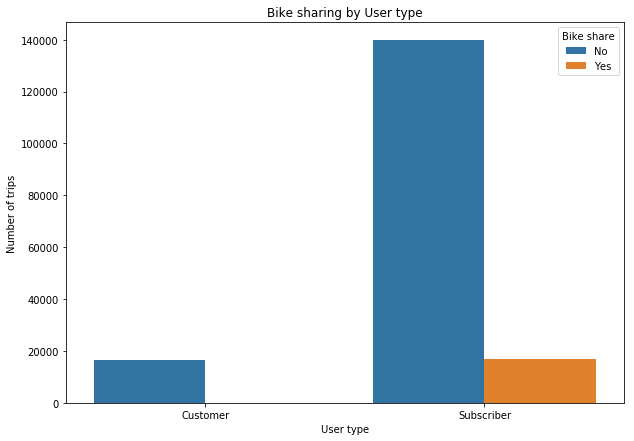

In [42]:
plt.figure(figsize=(10,7))

sb.countplot(data = df_clean, hue = 'bike_share_for_all_trip', x = 'user_type')
plt.title('Bike sharing by User type')
plt.xlabel('User type')
plt.ylabel('Number of trips')
plt.legend(title = 'Bike share')
plt.show()

>**Observation**: bike share for all trip is no for user type Customer

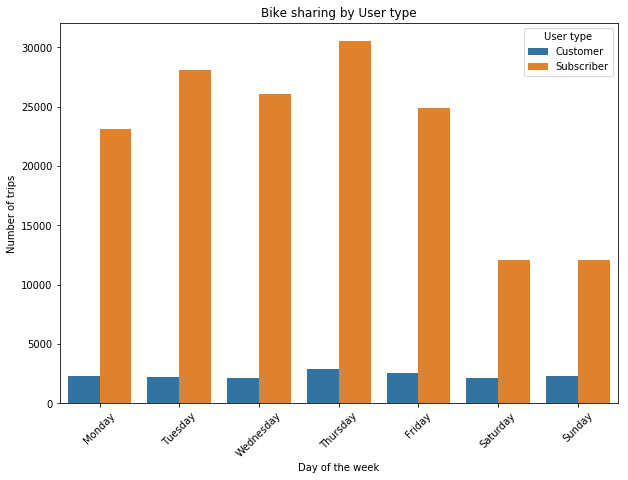

In [43]:
plt.figure(figsize=(10,7))
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sb.countplot(data = df_clean, x = 'start_time_weekday', hue = 'user_type',
            order=weekday)
plt.title('Bike sharing by User type')
plt.xlabel('Day of the week')
plt.ylabel('Number of trips')
plt.legend(title = 'User type')
plt.xticks(rotation=45)
plt.show()

>**Observation**: for both user types, there are more trips on Thursday than any other day of the week

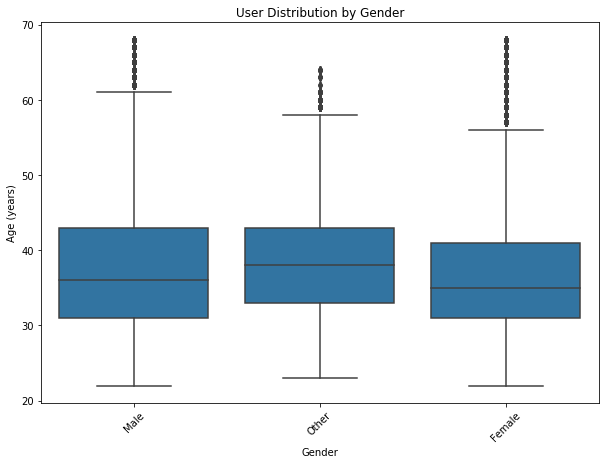

In [44]:
# plotting box plot 

plt.figure(figsize=(10,7))
sb.boxplot(data = df_clean, x = 'member_gender', y = 'age', color=color)
plt.title('User Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age (years)')
plt.xticks(rotation = 45)
plt.show()

>**Observation**: female have the lowest median age

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>I observed that the user type customer make longer bike rides that subscriber.
Even though age does not seem to place a significant role on the duration of rides, I observed that users above 60 years make shorter trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Bike sharing is common with subscribers, customers don't share.

## Multivariate Exploration

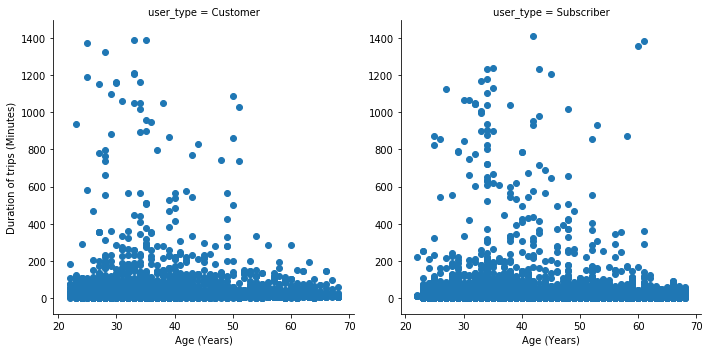

In [45]:
# create a FacetGrid to show age and duration of trip distribution by User type

g = sb.FacetGrid(data = df_clean, col = 'user_type', size = 5, margin_titles = True)
g.map(plt.scatter, 'age', 'duration_min')
g.set_axis_labels('Age (Years)', 'Duration of trips (Minutes)');

>**Observation**: 
 - for both user type, there is no significant correlation between age and duration of trips
 - for subscribers users above 60 years still make long bike trip compare to users identified as customers where user above 50 years do not make longer bike trips

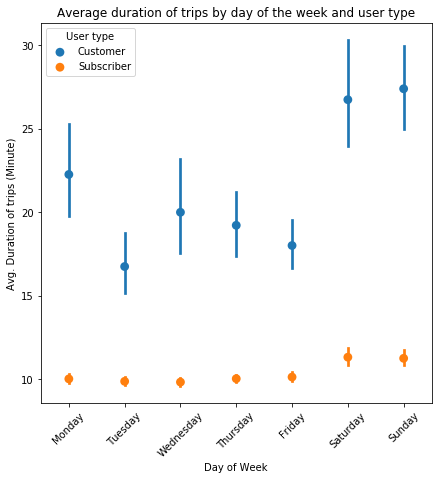

In [46]:
# average duration of trips by day of the week and user type

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


plt.figure(figsize=(7,7))
sb.pointplot(data = df_clean, x = 'start_time_weekday', y = 'duration_min', hue = 'user_type', 
             linestyles = '', dodge = False, order = weekday)
plt.title('Average duration of trips by day of the week and user type')
plt.xlabel('Day of Week')
plt.ylabel('Avg. Duration of trips (Minute)')
plt.xticks(rotation = 45)
plt.legend(title = 'User type')
plt.show()

>**Observation**: 
- On average customers take longer ride than subscribers
- On average both customers and subscribers take longer ride on weekends

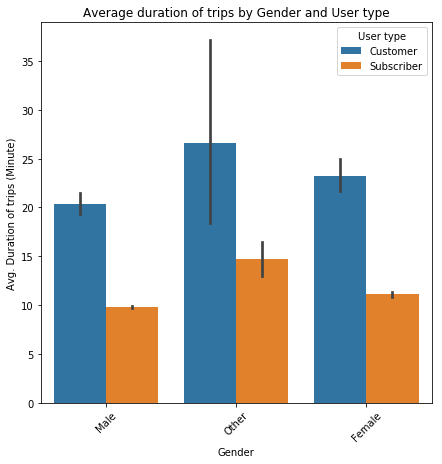

In [47]:
# create a clustered barplot

plt.figure(figsize=(7,7))
sb.barplot(data = df_clean, x = 'member_gender', y = 'duration_min', hue = 'user_type')
plt.title('Average duration of trips by Gender and User type')
plt.xlabel('Gender')
plt.ylabel('Avg. Duration of trips (Minute)')
plt.xticks(rotation = 45)
plt.legend(title = 'User type')
plt.show()

>**Observation**: 
- Irrespective of the user type, on average users with gender as `Other` take longer ride than female and male users

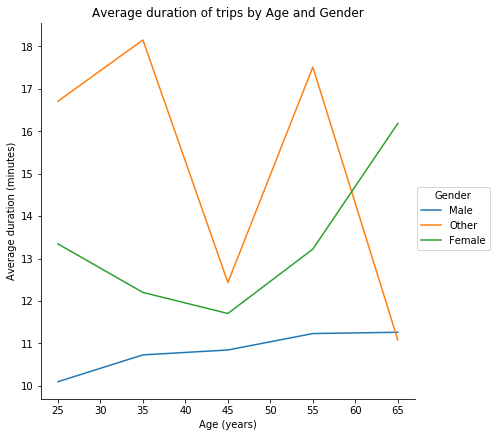

In [48]:
# create a line plot 

def avg_poly(x, y, bins = 10, **kwargs):
    # set bin edges
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # get counts
    data_bins = pd.cut(x, bins, right = False, include_lowest = True)
    avg = y.groupby(data_bins).mean()

    # create the plot
    plt.errorbar(x = bin_centers, y = avg, **kwargs)

bin_edges = np.arange(20, df_clean.age.max()+10, 10)
g = sb.FacetGrid(data = df_clean, hue = 'member_gender', size = 6)
g.map(avg_poly, 'age', 'duration_min', bins = bin_edges)
g.set_xlabels('Age (years)')
g.set_ylabels('Average duration (minutes)')
plt.title('Average duration of trips by Age and Gender')
g.add_legend(title = 'Gender')
plt.show()

>**Observation**: 
 - from age about 22 - 60 years, the gender `Other` makes longer trip than female and male. But the duration of trip drops after age 60 years.
 - beyond 60 years, females users make longer trips.

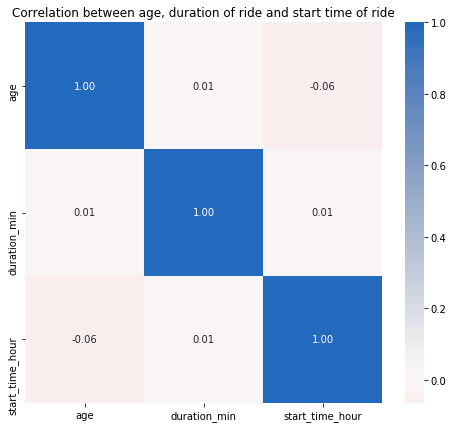

In [49]:
# heatmap to show relationship between age, duration of ride and start time of ride

plt.figure(figsize=(8,7))
sb.heatmap(df_clean[['age','duration_min','start_time_hour']].corr(), annot = True, fmt = '.2f',  cmap = 'vlag_r', center = 0)
plt.title('Correlation between age, duration of ride and start time of ride')
plt.show()

>**Observation**: there is no significant correlation between age, duration of ride and start time of trips

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration strengthened the bivariate and univariate exploration.
I observed that users tend to make longer bike ride on weekends than weekdays.
I observed that the user type customer make longer bike rides that subscriber.
Even though age does not seem to place a significant role on the duration of rides, I observed that users above 60 years make shorter trips.
Females make longer trips than males.

### Were there any interesting or surprising interactions between features?

> Yes there is, I thought there will be a strong negative correlation between Age and Duration of trips, but it turns out there is no significant correlation.

## Conclusions
> - There are two users categories, Subscriber and Customer.
> - Two peak period was observed in the dataset, there are more trips in the morning between 7-10 AM, and in the evening between 5-7 PM.
> - There are more bike trips during the weekdays (Monday - Friday) than on weekends (Saturday and Sunday), but on average the duration of trips on weekend is higher than that of weekdays.
